#Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

earthquakes = pd.read_csv('/content/earthquakes.csv')
fb_stocks = pd.read_csv('/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

Text(0.5, 1.0, 'Correlation between earthquake magnitude and tsunami with magType mb ')

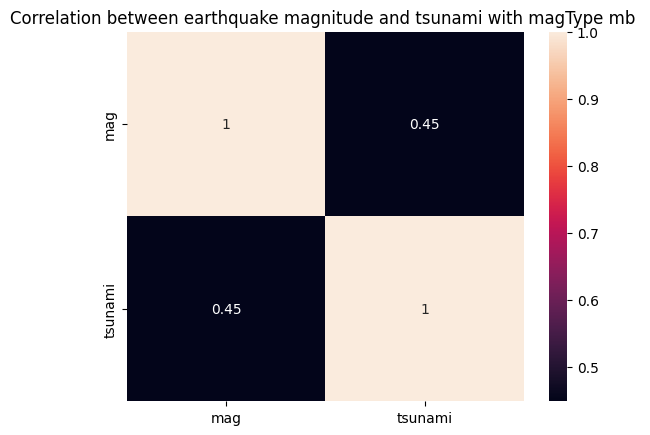

In [ ]:
earth_corr = earthquakes.query('magType == "mb"')[['mag','tsunami']]

sns.heatmap(earth_corr.corr(), annot=True, cmap='rocket')
plt.title('Correlation between earthquake magnitude and tsunami with magType mb ')

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)


Text(0.5, 1.1, 'Facebook volume traded and closing price with Tukey Fence bounds')

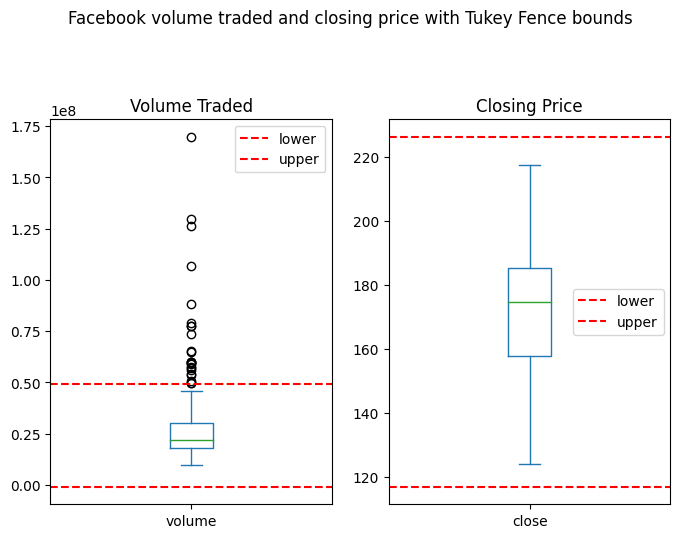

In [ ]:
cols =['volume', 'close']
subset = fb_stocks[cols]

quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] =quantiles.loc[0.75,:] -quantiles.loc[0.25,:]

axes =subset.plot(kind='box', subplots=True, figsize=(8, 5), title=['Volume Traded', 'Closing Price'])
for ax, col in zip(axes, cols):
  stats =quantiles[col]
  lower =stats.loc[0.25] -1.5 *stats['iqr']
  upper =stats.loc[0.75] +1.5 *stats['iqr']
  for bound, name in zip([lower, upper], ['lower', 'upper']):
    ax.axhline(bound, color='red', linestyle='dashed', label=name
    )
    ax.legend()
plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds', y=1.1)

3. Fill in the area between the bounds in the plot from exercise #2.


Text(0.5, 1.1, 'Facebook volume traded and closing price with Tukey Fence bounds')

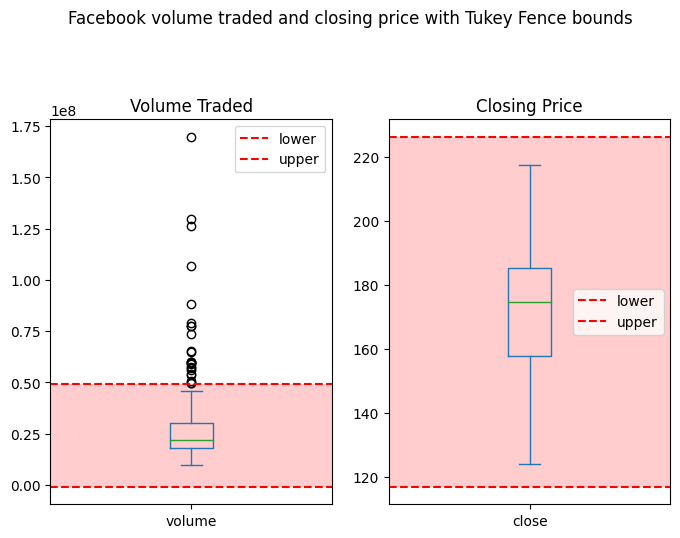

In [ ]:
cols =['volume', 'close']
subset = fb_stocks[cols]

quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] =quantiles.loc[0.75,:] -quantiles.loc[0.25,:]

axes =subset.plot(kind='box', subplots=True, figsize=(8, 5), title=['Volume Traded', 'Closing Price'])
for ax, col in zip(axes, cols):
  stats =quantiles[col]
  lower =stats.loc[0.25] -1.5 *stats['iqr']
  upper =stats.loc[0.75] +1.5 *stats['iqr']
  for bound, name in zip([lower, upper], ['lower', 'upper']):
    ax.axhline(bound, color='red', linestyle='dashed', label=name
    )
    ax.axhspan(lower,upper, facecolor='red', alpha=0.1)
    ax.legend()

plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds', y=1.1)

4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.


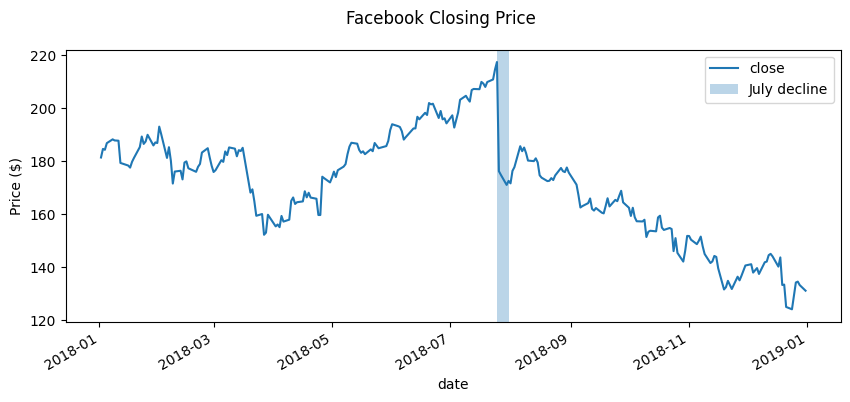

In [ ]:
fb_stocks.close.plot(kind ='line', figsize =(10, 4))
plt.axvspan( '2018-07-25', '2018-07-31', alpha =0.3, label ='July decline', )

plt.ylabel('Price ($)')
plt.suptitle('Facebook Closing Price')
plt.legend()

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
* Disappointing user growth announced after close on July 25, 2018
* Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
* FTC launches investigation on March 20, 2018


Text(0.5, 0.98, 'Facebook Closing Price')

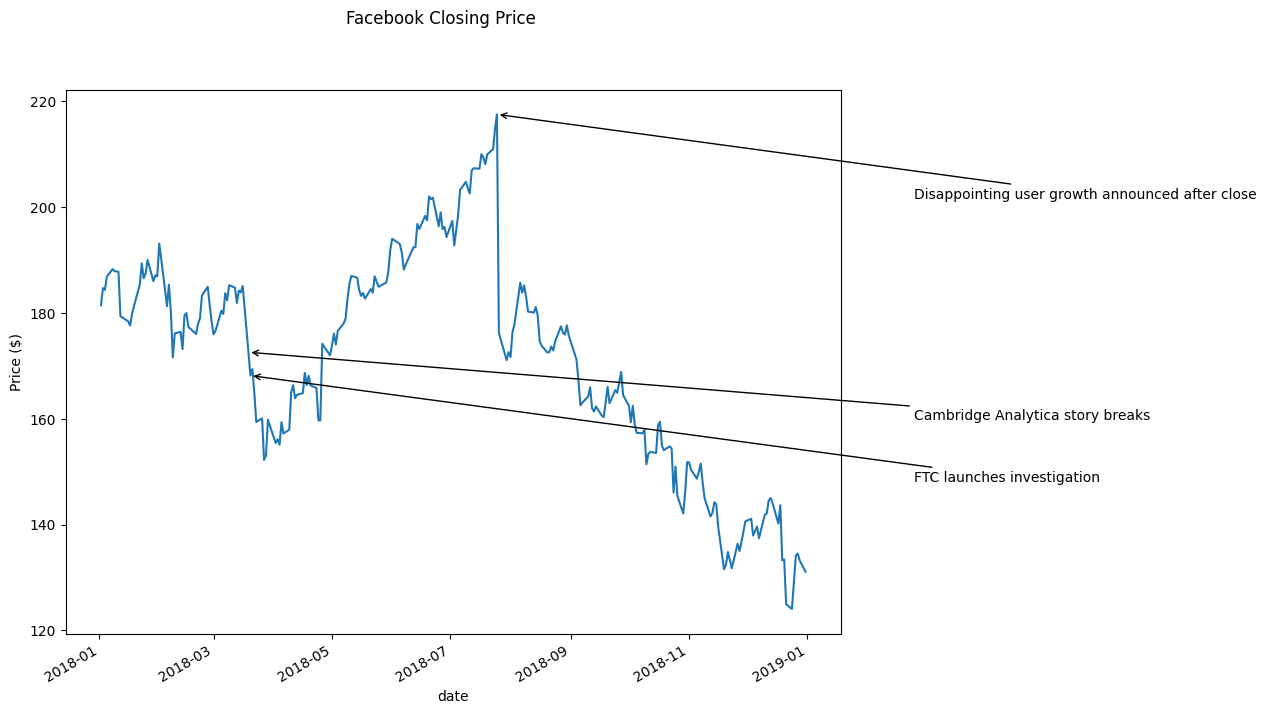

In [ ]:
fb_stocks.close.plot(kind='line', figsize=(10,8))

annotations = [('Disappointing user growth announced after close', '2018-07-25'),
 ('Cambridge Analytica story breaks', '2018-03-19'),
  ('FTC launches investigation', '2018-03-20')]

# for repeatable random jitter
np.random.seed(1)

for text, date in annotations:
  y_value = fb_stocks.close[date]
  jitter = np.random.uniform(-20, -10, 1)
  plt.annotate(
      text,
      xy = (date, y_value),
      xytext =( '2019-02-25', y_value +jitter),
      arrowprops = dict(arrowstyle ='->')
  )

plt.ylabel('Price ($)')
plt.suptitle('Facebook Closing Price')

6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

<ipython-input-58-75d9ad2af4d4>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  func(x=x, y=y, data=data, ax=subplot, color=cm.get_cmap(cmap_name)(0.5))  # Use color at center


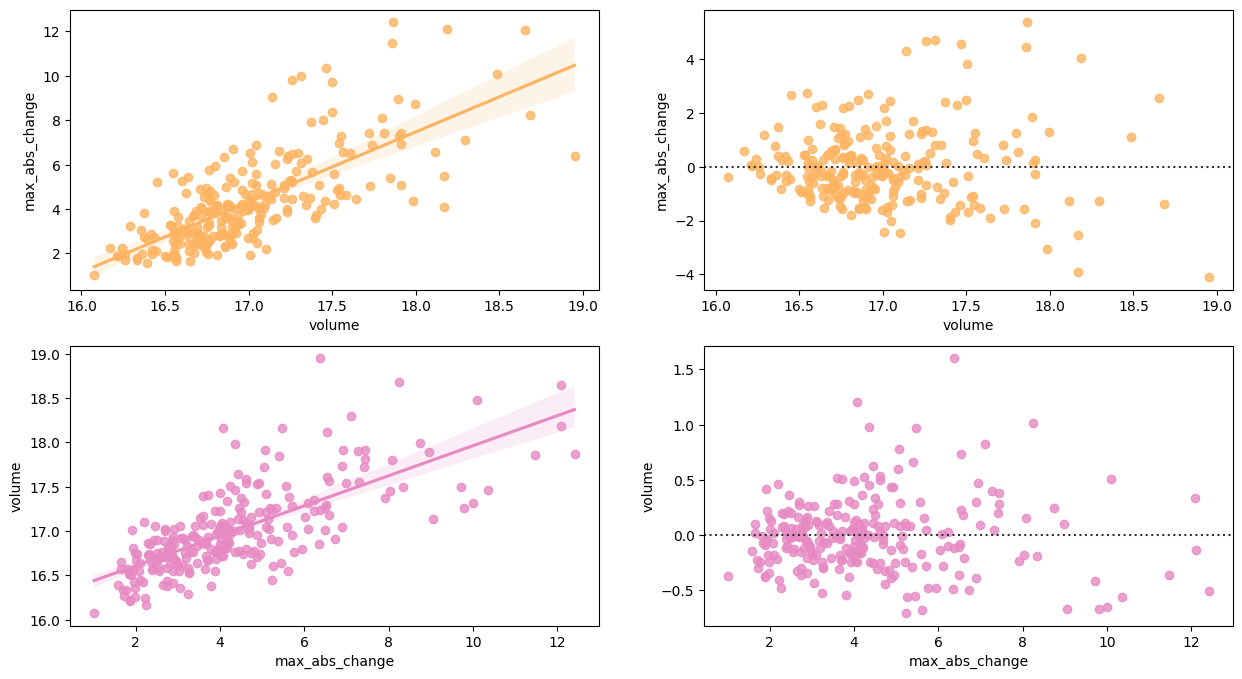

In [ ]:
import itertools
import random

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


def reg_resid_plots(data):

    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    # Get a list of all registered colormaps
    ql_cmaps = qualitative_cmaps

    for (x, y), axes in zip(
        itertools.permutations(data.columns, 2),
        ax,
    ):
        # Randomly choose a colormap name
        cmap_name = random.choice(ql_cmaps)

        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=cm.get_cmap(cmap_name)(0.5))  # Use color at center

    plt.close()
    return fig


fb_reg_data = fb_stocks.assign(
    volume=np.log(fb_stocks.volume),
    max_abs_change=fb_stocks.high - fb_stocks.low
    ).iloc[:,-2:]

reg_resid_plots(fb_reg_data)

#Conclusion

For this activity, I had difficulties when it comes to box plotting. I find it hardest to deal with because of its complexity. But after a few tries, I am slowly learning my way up. I find out that heatmap is used for determining the strength of relationships between numerical variables just like in number 1. In seeing stock market trends, Box plots helps in analyzing for each month, how the data is varying over the various years of time series